<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 2 - Parte 2  </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Rodrigo Hermosilla
* Eliana Providel
* Sebastián Rodriguez

<a id="tercero"></a>
## 2. Regularización para regresión. 

> Un problema que podemos encontrar transversalmente a todos los modelos es el problema del _overfitting_. Este problema consiste en un modelo que aprende demasiado bien los datos de ejemplo o entrenamiento, al punto que al momento de ver ejemplos desconocidos o de validación, baja su desempeño respecto a un modelo "menos entrenado". En algunos casos podriamos decir que el modelo "aprende de memoria" los ejemplos, en vez de intentar obtener información generalizable a partir de su entrenamiento. Para el caso de la regresión, una de las aproximaciones más comunes para tratar de mitigar este efecto es el de la regularización. Agregando una penalización a la norma de los parametros de la regresión podemos restringir la eficiencia del modelo al momento de aprender los datos de entrenamiento, incluso forzando dependiendo de la intensidad de la regularización que algunos parametros se vuelvan cero. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:13.9cm;"  />

> En esta pregunta utilizaremos nuevamente la base de datos de precios de casas en King County, https://www.kaggle.com/harlfoxem/housesalesprediction, que utilizamos en la Tarea 1. Utilizaremos estos datos ya conocidos y analizados anteriormente para enfocarnos en la regularización para regresión. Exploraremos como varian los distintos errores de predicción y como cambian los valores de los parámetros ajustados por el modelo para distintos valores del coeficiente de regularización, para tratar de entender que ocurre con las distintas regularizaciones y sus diferencias. 

#### 2.a Carga y preprocesamiento.
>Cargue y preprocese los datos de la misma forma en que lo realizó en la tarea 1, incluyendo estandarizar el _target_. Puede reciclar sus códigos y agregar modificaciones que le parezcan pertinentes.  Para esta parte utilize 0.5 de los datos como _training set_, 0.3 como _validation set_ y 0.2 como _test set_.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()
%matplotlib inline

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("kc_house_data.csv")
#revisando las columnas del dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
columns = list(data.columns)
columns.remove('id')
columns.remove('date')
#columns.remove('floors')
#columns.remove('waterfront')
#columns.remove('view')
#columns.remove('condition')
#columns.remove('grade')
columns.remove('zipcode')

#floors = pd.get_dummies(data.floors,prefix="floors")
#waterfront = pd.get_dummies(data.waterfront,prefix="waterfront")
#view = pd.get_dummies(data.view,prefix="view")
#condition = pd.get_dummies(data.condition,prefix="condition")
#grade = pd.get_dummies(data.grade,prefix="grade")
zipcode = pd.get_dummies(data.zipcode,prefix="zipcode")

data_pre = data[columns]
#data_pre = data_pre.join(floors)
#data_pre = data_pre.join(waterfront)
#data_pre = data_pre.join(view)
#data_pre = data_pre.join(condition)
#data_pre = data_pre.join(grade)
data_pre = data_pre.join(zipcode)
data_pre["price"] = data["price"]
data_pre.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tr_df, temp_df = train_test_split(data_pre, test_size=0.5,random_state=7)
val_df, test_df = train_test_split(temp_df, test_size=0.4,random_state=7)
print("Train(%): ", len(tr_df)*100/len(data_pre))
print("Val(%):   ", len(val_df)*100/len(data_pre))
print("Test(%):  ", len(test_df)*100/len(data_pre))

Train(%):  49.997686577522785
Val(%):    30.000462684495442
Test(%):   20.00185073798177


In [6]:
scales_columns = {}
for col in data_pre.columns:
    mu = tr_df[col].mean()
    sigma = tr_df[col].std()
    scales_columns[col] = (mu,sigma)
    tr_df.loc[:,col] = tr_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    val_df.loc[:,col] = val_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    test_df.loc[:,col] = test_df.loc[:,col].apply(lambda x: (x - mu)/sigma)

x_tr = tr_df.drop(columns=['price'])
y_tr = tr_df['price']

x_val = val_df.drop(columns=['price'])
y_val = val_df['price']

x_test = test_df.drop(columns=['price'])
y_test = test_df['price']


In [7]:
def inverse_transform(data,column):
    mu, sigma = scales_columns[column]
    return (data*sigma) + mu

In [8]:
#scales_columns #Descomentar para obtener el mu y sigma

#### 2.b Modelo sin regularización
>Entrene un modelo de regresión lineal no regularizado con los datos preprocesados. Calcule el error cuadrático medio (MSE) del modelo para el conjunto de validación y el de entrenamiento. 

In [9]:
reg = LinearRegression()
reg.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
mse = ((inverse_transform(reg.predict(x_tr),'price') - inverse_transform(y_tr,'price'))**2).mean()
print("MSE Training:   {}".format(mse))

mse = ((inverse_transform(reg.predict(x_val),'price') - inverse_transform(y_val,'price'))**2).mean()
print("MSE Validación: {}".format(mse))

MSE Training:   24976545520.31761
MSE Validación: 28171210383.370995


Para la regresión se utilizan los datos escalados, y luego para predecir se realiza la predicción escalada, y luego esta se transforma para poder hacer la medición del error. Esto se realiza tanto para el conjunto de train como para el conjunto de validación.

#### 2.c Regularización
>Discuta que busca realizar (en términos del ajuste de los parámetros del modelo de regresión lineal) la regularización de _Lasso_. ¿Por qué se habla de penalización en norma $L^1$? Apóyese de ecuaciones. ¿Qué importancia tiene el parámetro de regularización $\lambda$? 

>¿Qué diferencia hay entre _Lasso_ y _Ridge_? 

** Discusión **

Los regularizadores permiten evitar el sobreajuste en un modelo. El sobreajuste puede darse por la presencia de ruido en los datos, provocando que los pesos no se ajusten de forma correcta y que luego no sea posible obtener una generalización para datos futuros (datos que no se han utilizando en el entrenamiento).
Por lo que el regularizador indica cuando queremos penalizar un modelo y el aumento de sus coeficientes (flexibilidad del modelo), por lo que una aproximación correcta para podemos minimizar la función,

$$ \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 $$

es necesario que los coeficientes sean pequeños, y para esto es que se utilizan los regularizadores, ayudando a que estos valores tiendan a cero.

A continuación se  explican los regularizadores *Ridge* y *Lasso*.


- Regularizador Lasso($L_1$)
$$ \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p}|\beta_j| $$

Se dice que es la norma $L_1$, debido a que el coeficiente de acortamiento (*shrinkage*), esta bajo la sumatoria de la norma de los coeficientes ($\sum_{j=1}^{p}|\beta_j|$). Escrito de forma general, se dice que el problema de regresión con regularización para una norma $L_p$ se puede plantear como: 

$$ min \{\frac{1}{N}||y-\beta_0 -X\beta||^2_2 \} S.A. ||\beta||_p <= t$$

donde $$||\beta||_p = (\sum_{i=1}^N|Z_i|^p)^{1/p}$$

Entonces, se dice norma $L_1$ debido a que $p=1$

- Regularizador Ridge ($L_2$)

$$ \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p}\beta_j^2 $$

Tal como se definio anteriormente, el regularizador ridge utiliza $L_2$ para el coeficiente de acortamiento, esto nos deja un coeficiente de la forma: $\lambda \sum_{j=1}^{p}\beta_j^2$. A medida que nosotros modelamos el parámetro $\lambda$, vamos a tener múltiples posibles coeficientes para modelar el problema.

**¿Qué importancia tiene el parámetro de regularización $\lambda$? **

El penalizador del modelo, esta representado por el parámetro $\lambda$, indicando que tanto queremos penalizar la flexibilidad del modelo. Es decir, afectando el valor de los coeficientes, permitiendo obtener coeficientes con valores pequeños.
*Con esto también, se reduce la asociación estimada de cada variable con la respuesta (excepto $\beta_0$).*

Cuando $\lambda = 0$, indica que no existe penalización.

Cuando $\lambda > 0$, debido a que estamos minimizando, ahora no solo estamos interesados en minimizar esto: $ \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij})^2 $, sino que, agregamos el término en la condición de minimización $\lambda \sum_{j=1}^{p}\beta_j^2$ (o $\lambda \sum_{j=1}^{p}|\beta_j|$ en el caso de lasso) el cual va a tratar de minimizar los coeficientes $\beta^2_j$ dado el valor de lambda.

Cuando $\lambda \to \infty$, para hacer la minimización, los coeficientes entonces tendran que achicarse dejandolos cercanos a 0

**General:**
- El regularizador lasso tiene un comportamiento similar a la regresión ridge, en que a medida que aumenta $\lambda$, la varianza (Error de estimación) disminuye y el sesgo (error de aproximación) aumenta. En ese sentido, estos modelos nos permiten trabajar el tradeoff sesgo y varianza con el objetivo de minimizar el error de predicción.
- Ridge acerca los coeficientes hacia el valor de cero, a diferencia de lasso que deja los coeficientes en 0 a medida que $\lambda$ aumenta. Esto permite que este ultimo se utilice para interpretabilidad del modelo, en conjunto con selección de características. 
- Para lasso, valores de $\lambda$ altos pueden traer problemas, debido a que el predictor se sesga y deja todos los coeficientes en $0$, mientras que para ridge se necesitan valores muy grandes de $\lambda$ para presenciar un comportamiento similar.
     
*Ref: An Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani.*

#### 2.d Influencia sobre el error
>Grafique como varia el error de entrenamiento y el error de validación a medida se cambia el valor del parámetro $\lambda$. Para esto debe entrenar un modelo para cada uno de los parámetros que considerará en el gráfico y calcular el MSE para ambos sets. Comente sobre lo que ve en el gráfico y si lo encuentra pertinente puede calcular en más detalle alguna zona que le parezca interesante. 
Es conveniente entrenar primero unos cuantos modelos con valores de $\lambda$ escogidos manualmente para saber mejor en que intervalo resulta pertinente calcular estos valores (para _Ridge_ se necesitan valores más altos en este caso para ver la influencia sobre el error).

>Note que el parámetro $\lambda$ es sensible a la escala de los datos, por lo cual deberá estudiar valores distintos dependiendo de si estandarizó el _target_ o no. 

In [11]:
from sklearn.linear_model import Lasso, Ridge

In [12]:
#variando os valores de lasso
# for example:
MSE_tr_list_l1 = []
MSE_val_list_l1 = []

space_l1 = pd.np.logspace(-2, 0,100)
for lambd in space_l1:
    model = Lasso(alpha=lambd)
    model.fit(x_tr,y_tr)
    mse_tr = ((inverse_transform(model.predict(x_tr),'price') - inverse_transform(y_tr,'price'))**2).mean()
    mse_val = ((inverse_transform(model.predict(x_val),'price') - inverse_transform(y_val,'price'))**2).mean()
    MSE_tr_list_l1.append(mse_tr)
    MSE_val_list_l1.append(mse_val)


In [13]:
#variando los valores de ridge
# for example:
MSE_tr_list_l2 = []
MSE_val_list_l2 = []

space_l2 = pd.np.logspace(-2,6,1000)
for lambd in space_l2:
    model = Ridge(alpha=lambd)
    model.fit(x_tr,y_tr)
    mse_tr = ((inverse_transform(model.predict(x_tr),'price') - inverse_transform(y_tr,'price'))**2).mean()
    mse_val = ((inverse_transform(model.predict(x_val),'price') - inverse_transform(y_val,'price'))**2).mean()
    MSE_tr_list_l2.append(mse_tr)
    MSE_val_list_l2.append(mse_val)


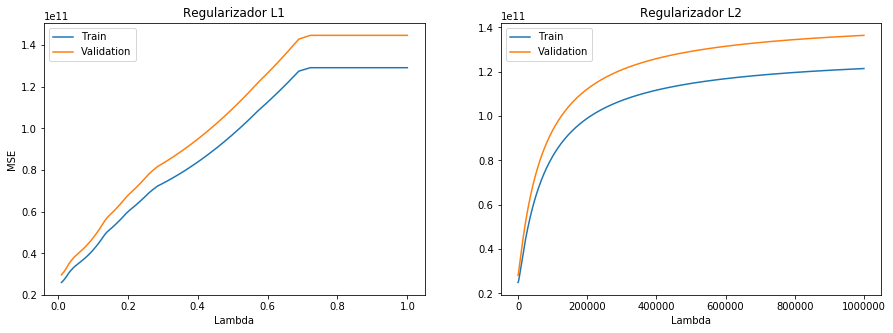

In [14]:
#comparación gráfica de lasso y ridge
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(space_l1,MSE_tr_list_l1, label = "Train")
ax[0].plot(space_l1,MSE_val_list_l1, label = "Validation")
ax[0].set_title("Regularizador L1")
ax[0].set_xlabel("Lambda")
ax[0].set_ylabel("MSE")
ax[0].legend()

ax[1].plot(space_l2,MSE_tr_list_l2, label="Train")
ax[1].plot(space_l2,MSE_val_list_l2, label = "Validation")
ax[1].set_title("Regularizador L2")
ax[1].set_xlabel("Lambda")
#ax[1].set_ylabel("MSE")
ax[1].legend()

Para Lasso (L1), podemos observar que a partir desde un valor de $\lambda \approx 0.75$ el error cuadratico medio ($MSE$) queda en su valor mas alto, tanto para el conjunto de entrenamiento, como el de validación. Mas adelante vamos a mostrar que para $\lambda$ cercano a  $0.75$ es el punto en el que deja todos los coeficientes asociados a la regresión en cero.

Para Ridge (L2) valores mas altos de $\lambda$ son necesarios para obtener un comportamiento parecido a L1 (en terminos del $MSE$). Esto es debido a que L2 para valores altos de $\lambda$ tiende a disminuir los valores de los coeficientes a cero. Ante ambos modelos podemos presenciar que los mejores valores para $\lambda$ corresponde a los cercanos a cero.

#### 2.e Influencia sobre los coeficientes
>Grafique ahora como se comporta el valor de los coeficientes del modelo lineal en el modelo entrenado a medida crece $\lambda$, tanto para _Lasso_ como para _Ridge_. Para esto entrene un modelo para cada valor de $\lambda$ y guarde sus coeficientes, como propone el princio de código a continuación. Debe explorar valores de $\lambda$ donde todos los coeficientes sean no nulos hasta valores donde todos los coeficientes se anulan. 

>¿Qué diferencias ve entre _Ridge_ y _Lasso_? ¿Coincide este comportamiento con lo que esperaría teóricamente de cada uno de los modelos? 

>¿Podemos utilizar estos gráficos para discutir sobre la cantidad de información que entrega cada uno de los atributos para predecir el _target_? ¿Cual de ambos (_Ridge_ o _Lasso_) le parece mejor para este tipo de discución? Compare lo que muestran estos gráficos con alguna otra aproximación para medir la significancia de cada atributo (como correlación o _mutual information_ por ejemplo) y discuta. 

Para lasso, el lambda que deja todos los coef en cero es 0.7273484848484848


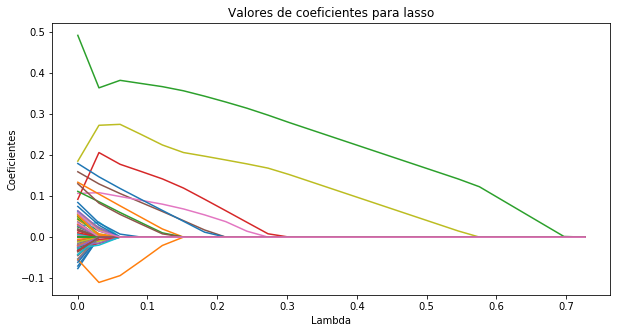

In [15]:
space = pd.np.linspace(0.0001,3,100) 
# should be fine for Lasso, for Ridge try space = pd.np.logspace(0,10,50) and plot x on a logarithmic
# scale (you can simply do np.linspace(0,10,50) when setting x values for the plot)
coefs = []
for l in space:
    model = Lasso(alpha=l)
    model.fit(x_tr,y_tr)
    coefs.append(model.coef_)
    if np.sum(model.coef_) == 0:
        print("Para lasso, el lambda que deja todos los coef en cero es {}".format(l))
        break

index_l = space.tolist().index(l) + 1
x_cols = x_tr.columns
fig = plt.figure(figsize=(10,5))
plt.xlabel("Lambda")
plt.ylabel("Coeficientes")
plt.title("Valores de coeficientes para lasso")
for y_arr, label in zip(pd.np.squeeze(coefs).T, x_cols):
    plt.plot(space[:index_l], y_arr, label=label)
    #plt.legend()
    # . . .

Para este gráfico tenemos el problema que tenemos múltiples variables consideradas en el modelo, pero podemos presenciar como todas los coeficientes parten con valores distintos a cero y luego de un par de iteraciones tieden a quedar todos en cero, a excepción de: "sqft_living", "grade", "lat", "view", "condition" y algunos zipcode.

Para comprobar esto, presentaremos el siguiente mapa de calor:

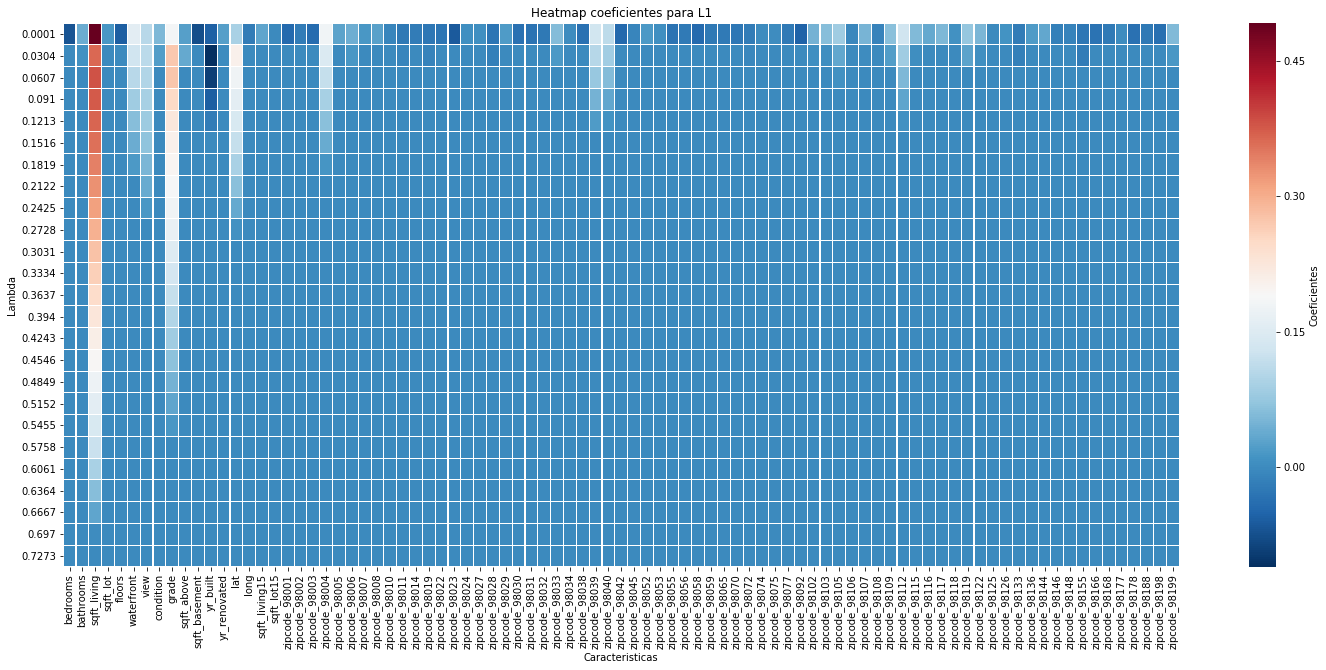

In [16]:
fig, ax = plt.subplots(1,1,figsize=(25,10))
new_space = [round(el,4) for el in space[:len(coefs)]]
ax = sns.heatmap(coefs,xticklabels=x_tr.columns,yticklabels=new_space,linewidths=.1,cmap="RdBu_r",cbar_kws={'label': 'Coeficientes'})
ax.set(xlabel='Caracteristicas', ylabel='Lambda',title="Heatmap coeficientes para L1")
plt.show()

En el caso de Ridge exploraremos un espacio que va desde $10^{-2}$, hasta $10^{10}$. Pero en vez de hacer que la suma de los coeficientes sean cero, el early stop de Ridge correspondera a un umbral (`th = 0.05`). Si el valor absoluto máximo de los coeficientes esta por debajo del umbral, detendremos la exploración de coeficientes

Para Ridge, el lambda que deja todos los coef por debajo del threshold 0.025 es 327454.9162877732


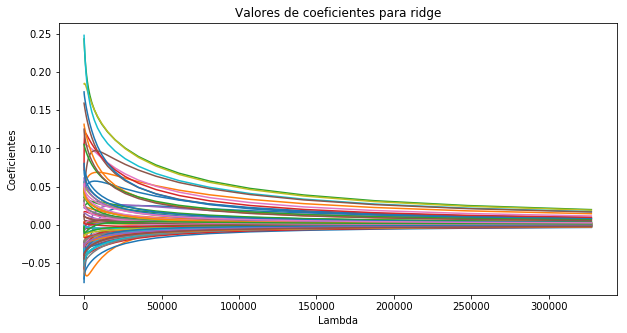

In [17]:
space = pd.np.logspace(-2,10,100)
# should be fine for Lasso, for Ridge try space = pd.np.logspace(0,10,50) and plot x on a logarithmic
# scale (you can simply do np.linspace(0,10,50) when setting x values for the plot)
coefs = []
th = 0.025
for l in space:
    model = Ridge(alpha=l)
    model.fit(x_tr,y_tr)
    coefs.append(model.coef_)
    if np.max(np.abs(model.coef_)) < th:
        print("Para Ridge, el lambda que deja todos los coef por debajo del threshold {} es {}".format(th,l))
        break

index_l = space.tolist().index(l) + 1
x_cols = x_tr.columns

fig = plt.figure(figsize=(10,5))
plt.xlabel("Lambda")
plt.ylabel("Coeficientes")
plt.title("Valores de coeficientes para ridge")
for y_arr, label in zip(pd.np.squeeze(coefs).T, x_cols):
    plt.plot(space[:index_l], y_arr, label=label)

Podemos observar que los coeficientes converjan a cero requiere un mayor valor de $\lambda$, observemos un rango acotado $[0.01,100000]$.

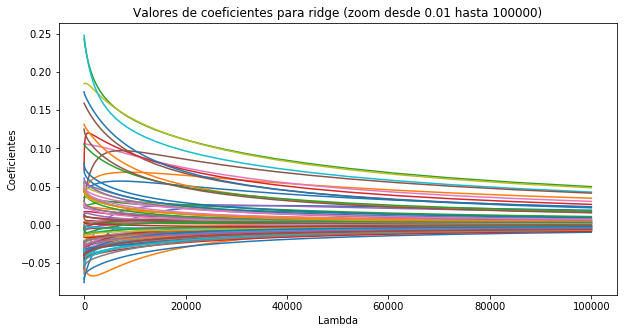

In [18]:
space2 = pd.np.logspace(-2,5,100)
# should be fine for Lasso, for Ridge try space = pd.np.logspace(0,10,50) and plot x on a logarithmic
# scale (you can simply do np.linspace(0,10,50) when setting x values for the plot)
coefs2 = []
th = 0.025
for l in space2:
    model = Ridge(alpha=l)
    model.fit(x_tr,y_tr)
    coefs2.append(model.coef_)
    if np.max(np.abs(model.coef_)) < th:
        print("Para Ridge, el lambda que deja todos los coef por debajo del threshold {} es {}".format(th,l))
        break

index_l2 = space2.tolist().index(l) + 1
x_cols = x_tr.columns
fig = plt.figure(figsize=(10,5))
plt.xlabel("Lambda")
plt.ylabel("Coeficientes")
plt.title("Valores de coeficientes para ridge (zoom desde 0.01 hasta 100000)")
for y_arr, label in zip(pd.np.squeeze(coefs2).T, x_cols):
    plt.plot(space2[:index_l2], y_arr, label=label)

Finalmente para Ridge, observemos el heatmap asociado a como evolucionan las caracteristicas para los valores de $\lambda$

[Text(159.0, 0.5, 'Lambda'),
 Text(0.5, 131.09375, 'Caracteristicas'),
 Text(0.5, 1.0, 'Heatmap coeficientes para L2')]

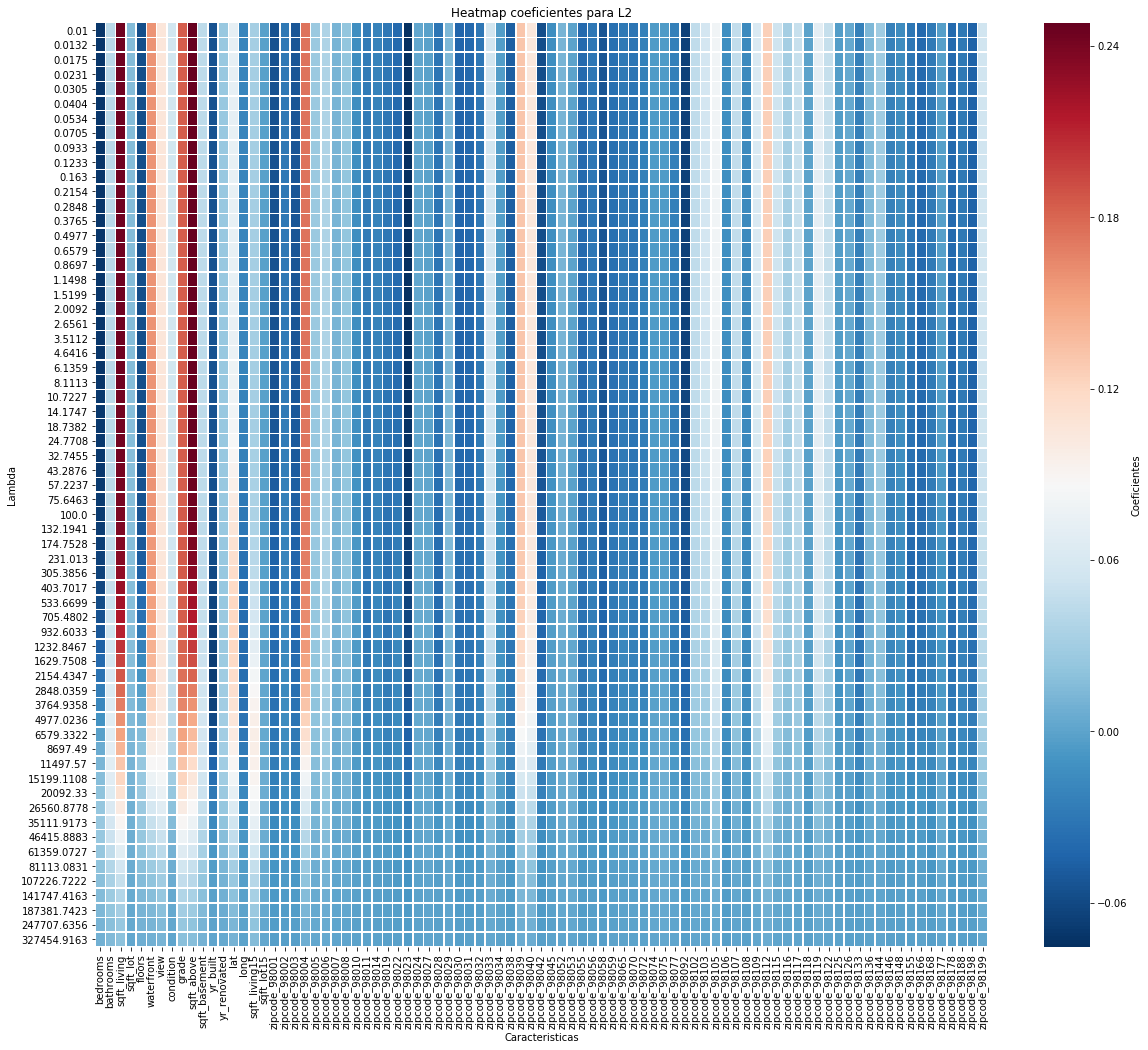

In [19]:
fig, ax = plt.subplots(1,1,figsize=(20,17))
new_space = [round(el,4) for el in space[:len(coefs)]]
ax = sns.heatmap(coefs,xticklabels=x_tr.columns,yticklabels=new_space,linewidths=.5,cmap="RdBu_r",cbar_kws={'label': 'Coeficientes'})
ax.set(xlabel='Caracteristicas', ylabel='Lambda',title="Heatmap coeficientes para L2")

**¿Qué diferencias ve entre Ridge y Lasso?**
De todos los gráficos presentados, podemos observar que Lasso es para valores de $\lambda$ pequeños despues del primero ($\lambda \geq 0.0304$) reduce casi a cero la mayoria de los coeficientes asociado a las características, siendo sqft_living la última en transformarse en un valor igual a cero. Para Ridge, podemos precenciar que los coeficientes demoran más en converger a cero (sin llegar a cero). Podemos ver tambien que hay otros coeficientes que por lo menos desde el punto de partida, son relevantes para ridge (zipcodes, conditions, waterfront, etc).

**¿Coincide este comportamiento con lo que esperaría teóricamente de cada uno de los modelos?**

Si. Lasso despues de un par de iteraciones **deja** los coeficientes en cero, mientras que Ridge los **acerca** a cero con valores de $\lambda$ altos.

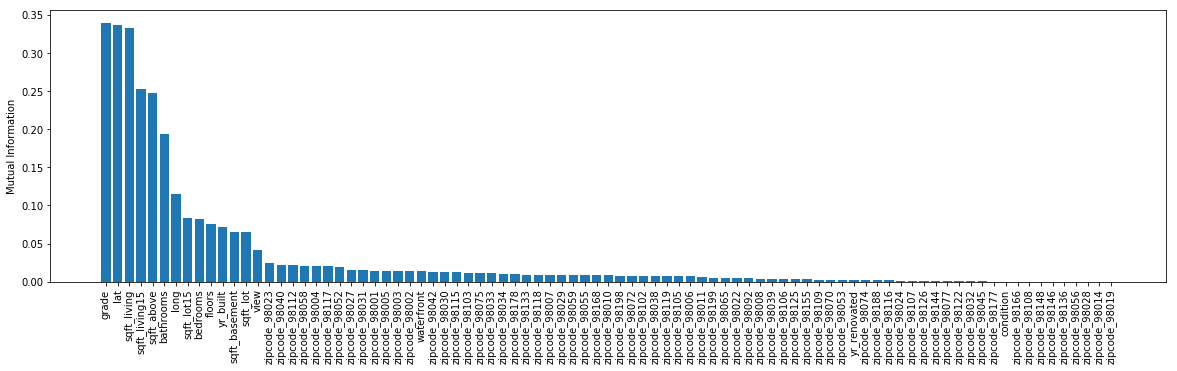

In [20]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_tr),x_tr.columns))
values = np.array([val[0] for val in MI])
features = np.array([val[1] for val in MI])
sort_idx = np.argsort(values)[::-1]
plt.figure(figsize=(20,5))
plt.bar(np.arange(1,len(values)+1),values[sort_idx])
plt.xticks(np.arange(1,len(values)+1), features[sort_idx])
plt.xticks(rotation=90)
plt.ylabel('Mutual Information')
plt.show()

**¿Podemos utilizar estos gráficos para discutir sobre la cantidad de información que entrega cada uno de los atributos para predecir el _target_?**

Historicamente Lasso se utiliza como medida para poder obtener el *feature importance* de las variables. En este caso vamos eliminando variables poco relevantes para poder hacer esta predicción. En este caso, para lasso el coeficiente que perdura a través del incremento de $\lambda$ es la variable `sqft_living`. Si uno observa el heatmap para $L_1$, podemos observar que la mayoria de las variables quedan en cero, mientras que pocas no. Esto es relevante debido a que si uno observa los primeros gráficos (MSE para lasso), vemos que el MSE no es tan distinto para este modelo con pocas variables. Más aún, en el dominio del problema, podemos observar que esta misma variable corresponde a una similaridad en el juicio humano a la aproximación del problema (mientras más grande la vivienda, más valor). 

ref: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf

**¿Cual de ambos (_Ridge_ o _Lasso_) le parece mejor para este tipo de discución?** 

Si se quiere considerar todas las variables, conviene Ridge. Si se quiere considerar cuales son las variables que importan en el target, conviene Lasso. 

Para este problema especifico, creemos que lo mejor es Lasso. Esto debido a que finalmente podemos ver cuales son las variables que tienen mayor importancia en el target. 

**Compare lo que muestran estos gráficos con alguna otra aproximación para medir la significancia de cada atributo (como correlación o _mutual information_ por ejemplo) y discuta.**

Podemos ver que por lo menos tres variables que entrega el gráfico de información mutua, coincide con lasso. Estas son "sqft_living", "grade", "lat"; considerando que la información mutua entrega la relacion de probabilidad de $x$ dado $y$ divido la probabilidad de $x$

$$ I(x_i;y_j) = log\frac{P(x_i|y_j)}{P(x_i)}$$



#### 2.f K-_fold_ sobre $\lambda$
>Realice 5-_fold_ o 10-_fold_ sobre el parámetro de regularización $\lambda$, ya sea para _Lasso_ o _Ridge_. Explore a lo menos 20 valores distintos de $\lambda$ en un intervalo relevante luego de lo aprendido en las preguntas anteriores. Utilice MSE como el error a minimizar. 

>Compare el error de entrenamiento y de validación para este modelo respecto al modelo lineal sin regularización entrenado inicialmente. ¿En su opinión se alcanza a apreciar el fenomeno de _overfitting_ para este conjunto de datos y el modelo logístico? **(¿Regresión lineal simple?)**

In [21]:
## PARA LASSO 
results = [] #Guarda promedios y desv estandard de validación
val_results = [] # Guarda puntos de MSE para el set de validación
train_results = [] # Guarda puntos de MSE para el set de training
space = pd.np.linspace(0.01,0.8,40) #40 lambdas desde 0.01 hasta 0.8 
for l in space:
    folds_results = []
    kf = KFold(n_splits=5,shuffle=True)
    for train_index, val_index in kf.split(x_tr.values):
        model = Lasso(alpha=l)
        model.fit(x_tr.values[train_index,:],y_tr.values[train_index])
        tr_pred = model.predict(x_tr.values[train_index,:])
        pred = model.predict(x_tr.values[val_index,:])
        tr_mse = metrics.mean_squared_error(inverse_transform(y_tr.values[train_index],'price'),inverse_transform(tr_pred,'price'))
        mse = metrics.mean_squared_error(inverse_transform(y_tr.values[val_index],'price'),inverse_transform(pred,'price'))
        folds_results.append(mse)
        val_results.append({'lambda':l,'mse':mse})
        train_results.append({'lambda':l,'mse':tr_mse})
    results.append({'lambda':l,'mse_mean':np.mean(folds_results),'mse_std':np.std(folds_results)})
results_lasso = pd.DataFrame(results)
val_results = pd.DataFrame(val_results)
train_results = pd.DataFrame(train_results)
val_results.head()


,lambda,mse
0,0.01,2.583099e+10
1,0.01,2.269439e+10
2,0.01,3.374494e+10
3,0.01,2.506174e+10
4,0.01,2.582169e+10


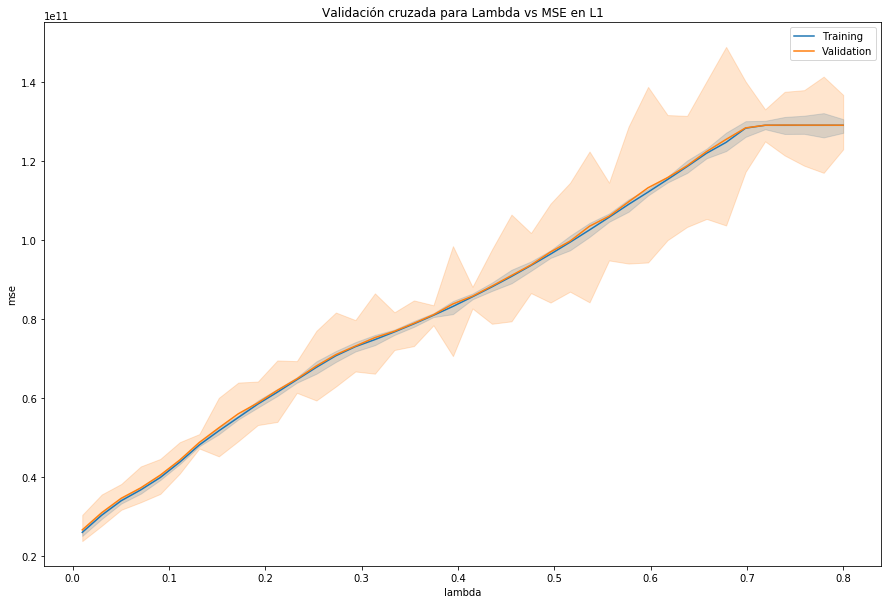

In [22]:
plt.figure(figsize=(15,10))
plt.title("Validación cruzada para Lambda vs MSE en L1")
ax = sns.lineplot('lambda','mse',data=train_results)
ax = sns.lineplot('lambda','mse',data=val_results,ax=ax)
ax.legend(['Training','Validation'])
plt.show()

In [23]:
## Para Ridge
results = []
val_results = []
train_results = []

space = pd.np.logspace(-2,6,100)
for l in space:
    folds_results = []
    kf = KFold(n_splits=5,shuffle=True)
    for train_index, val_index in kf.split(x_tr.values):
        # Creamos y entrenamos
        model = Ridge(alpha=l)
        model.fit(x_tr.values[train_index,:],y_tr.values[train_index])
        # Predecimos train y val
        tr_pred = model.predict(x_tr.values[train_index,:])
        pred = model.predict(x_tr.values[val_index,:])
        # obtenemos MSE
        tr_mse = metrics.mean_squared_error(inverse_transform(y_tr.values[train_index],'price'),inverse_transform(tr_pred,'price'))
        mse = metrics.mean_squared_error(inverse_transform(y_tr.values[val_index],'price'),inverse_transform(pred,'price'))
        # Guardamos en los arreglos correspondientes
        folds_results.append(mse)
        val_results.append({'lambda':l,'mse':mse})
        train_results.append({'lambda':l,'mse':tr_mse})
    #de folds_results obtenemos promedio y desv. estandar
    results.append({'lambda':l,'mse_mean':np.mean(folds_results),'mse_std':np.std(folds_results)})

#Generamos Dataframes    
results_ridge = pd.DataFrame(results)
val_results = pd.DataFrame(val_results)
train_results = pd.DataFrame(train_results)
results_ridge.head()

,lambda,mse_mean,mse_std
0,0.010000,2.567269e+10,4.371543e+09
1,0.012045,2.551879e+10,3.068243e+09
2,0.014508,2.583936e+10,3.111609e+09
3,0.017475,2.589379e+10,3.175837e+09
4,0.021049,2.590838e+10,2.023340e+09


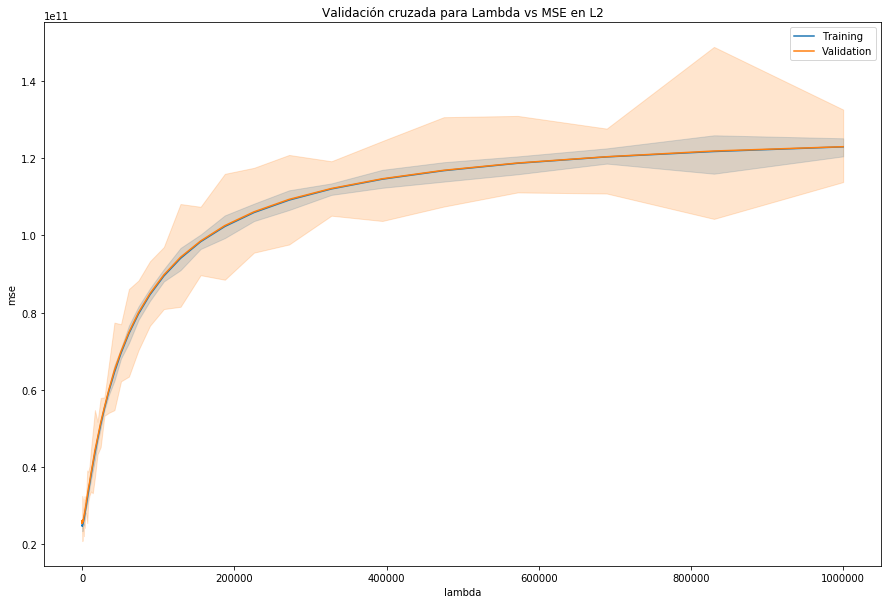

In [24]:
plt.figure(figsize=(15,10))
plt.title("Validación cruzada para Lambda vs MSE en L2")
ax = sns.lineplot('lambda','mse',data=train_results)
ax = sns.lineplot('lambda','mse',data=val_results,ax=ax)
ax.legend(['Training','Validation'])
plt.show()

In [25]:
##Solo para comprobar que no son las mismas rectas en Ridge
val_results.pivot_table(['mse'],'lambda',aggfunc=[np.mean,np.std]).head() #Tablas pivotes para validacion

,mean,std
,mse,mse
lambda,,
0.010000,2.567269e+10,4.887534e+09
0.012045,2.551879e+10,3.430400e+09
0.014508,2.583936e+10,3.478885e+09
0.017475,2.589379e+10,3.550694e+09
0.021049,2.590838e+10,2.262163e+09


In [26]:
##Solo para comprobar que no son las mismas rectas en Ridge
train_results.pivot_table(['mse'],'lambda',aggfunc=[np.mean,np.std]).head() #tabla pivote para training

,mean,std
,mse,mse
lambda,,
0.010000,2.489986e+10,1.224895e+09
0.012045,2.491670e+10,8.394813e+08
0.014508,2.488176e+10,8.430437e+08
0.017475,2.487600e+10,8.295786e+08
0.021049,2.487497e+10,4.839591e+08


In [27]:
best_lasso = results_lasso.sort_values(['mse_mean'],ascending=True).iloc[0]
l = best_lasso['lambda']

model = Lasso(alpha=l,)
model.fit(x_tr,y_tr)
    
pred_tr = model.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = model.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))

print("Lasso, el MSE de training fue: {} ".format(mse_tr))
print("Lasso, el MSE de validation fue: {} ".format(mse_val))

Lasso, el MSE de training fue: 26081076158.16007 
Lasso, el MSE de validation fue: 29741588317.061142 


In [28]:
best_ridge = results_ridge.sort_values(['mse_mean'],ascending=True).iloc[0]
l = best_ridge['lambda']

model = Ridge(alpha=l)
model.fit(x_tr,y_tr)
    
pred_tr = model.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = model.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))
print("Ridge, el MSE de training fue: {} ".format(mse_tr))
print("Ridge, el MSE de validation fue: {} ".format(mse_val))

Ridge, el MSE de training fue: 24976555801.511864 
Ridge, el MSE de validation fue: 28172298916.884224 


In [29]:
mse = ((inverse_transform(reg.predict(x_tr),'price') - inverse_transform(y_tr,'price'))**2).mean()
print("MSE Training Regresión lineal simple:   {}".format(mse))

mse = ((inverse_transform(reg.predict(x_val),'price') - inverse_transform(y_val,'price'))**2).mean()
print("MSE Validación Regresión lineal simple: {}".format(mse))

MSE Training Regresión lineal simple:   24976545520.31761
MSE Validación Regresión lineal simple: 28171210383.370995


**Compare el error de entrenamiento y de validación para este modelo respecto al modelo lineal sin regularización entrenado inicialmente.**

Podemos observar, que para ridge tenemos una mínima diferencia en el MSE con respecto al modelo de regresión lineal en el caso de training. En el caso de validación tenemos una diferencia de $0.000332\%$ aproximadamente de rendimiento peor en relación a la regresión lineal simple. En el caso de lasso, el mejor valor de $\lambda$ rindió peor que la regresión lineal ordinaria en ambos set de datos (train y validación).

**¿En su opinión se alcanza a apreciar el fenomeno de overfitting para este conjunto de datos y el modelo logístico? (¿Regresión lineal simple?)**

No podemos presenciar un overfitting para la regresión lineal simple. Más aún, es difícil visualizar los beneficios de generalización para las regresiones regularizadas. Esto es probablemente debido a que los mejores $\lambda$ están cerca de 0 (acercándonos al modelo de regresión lineal simple). 

#### 2.g _Grid search_ para SVM

>Para terminar, comparemos el desempeño de los métodos lineales con un método no lineal, las SVM. Para esto buscaremos ajustar los hiperparámetros más relevantes del modelo, en este caso el parámetro `C` y `epsilon`, la penalización y el margen de holgura. Comente sobre la significancia de estos parámetros y su influencia sobre la máquina. Luego realice una busqueda en un mallado de estos parámetros, evaluando el _score_ (coeficiente de determinación) o MSE o ambos.

>*Nota*: Entrenar una SVM toma mucho más tiempo que las regresiones lineales, por lo cual es recomendable probar primero su código en un número reducido de puntos y luego entrenar todos los modelos asegurandose de guardar bien los resultados. Si su maquina es muy lenta es incluso recomendable que esta parte la realice en _Collab_ de Google si desea explorar un número relevante de puntos. El mallado propuesto en el código es de referencia y puede elegirlo o construirlo como usted estime más conveniente. 

>De todos los modelos entrenados, ¿Cuál es el mejor? ¿Cómo se compara el desempeño de este modelo con el mejor modelo lineal encontrado por usted? Adjunte gráficos que le parezcan relevantes. 

**Comente sobre la significancia de estos parámetros y su influencia sobre la máquina. **

- `C` controla el tradeoff entre la complejidad del modelo y el error de entrenamiento
 - Para `C` bajo, hay mayor error de entrenamiento y suavidad en la frontera de decisión.
 - Para `C` alto, hay menor suavidad en la frontera de decisión y posibilidad de sobreajuste.
 
 
- `epsilon` es la variable que nos permite modelar la holgura para los datos mal clasificados dada la frontera de decisión.
 - Para `epsilon` bajo ($\epsilon \to 0$), penalizamos una mayor cantidad de errores (posible sobreajuste)
 - para `epsilon` alto, se permiten una mayor cantidad de errores de holgura (posible subajuste)

In [30]:
#Esto es solo para acelerar utilizando el cluster de computación que uno de los integrantes (sebastian) tiene acceso, 
# el codigo en modo iterativo realiza lo mismo, pero obviamente es mas lento por la secuencialidad.

#si se necesita, solo hay que dejar mode = "iterative" en la siguiente linea para hacer que funcione deforma iterativa sin el cluster 
mode = "parallel"

In [31]:
from sklearn.svm import SVR
if mode == "iterative":
    results = []
    Cs, epsilons = pd.np.meshgrid(np.logspace(-2,3,20),[i/20 for i in range(1,21)])

    for C, epsilon in zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1))):
        sv = SVR(C=C, epsilon=epsilon)
        sv.fit(x_tr,y_tr)
        pred = sv.predict(x_val)
        mse = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred,'price'))
        results.append({'C':C[0],'epsilon':epsilon[0],'mse':mse}) 
        # fit and save the scores for each one
    results = pd.DataFrame(results)

In [32]:
if mode == "parallel":
    #Importamos el cliente para hacer la conexion al cluster
    from ipyparallel import Client
    rc = Client(profile='pucv-cluster') #Cargamos el perfil, 60 nodos 
    rc.purge_everything() #Limpiamos la sesion
    dview = rc[5:] # Ocupamos 55, dejando 5 para que otros usuarios puedan hacer sus computos
    dview.block = True # Dejamos modo bloqueo, para poder hacer llamadas sincronas
    
    with dview.sync_imports(): #para todos los nodos dentro de la vista (dview) importamos las librerias relevantes
        from sklearn.svm import SVR #svr
        from sklearn import metrics #metricas para obtener el MSE

    dview['x_tr'] = x_tr #Distribuimos a los nodos de la vista, el arreglo x_tr
    dview['y_tr'] = y_tr #y_tr

    dview['x_val'] = x_val #x_val
    dview['y_val'] = y_val #y_val

    dview['inverse_transform'] = inverse_transform #la funcion para revertir el scaling
    dview['scales_columns'] = scales_columns # mu y sigmas para cada variable
    
    Cs, epsilons = pd.np.meshgrid(np.logspace(-2,3,20),[i/20 for i in range(1,21)]) #generamos nuestra grilla
    c_y_epsilon = list(zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1)))) #la generamos como una lista
    
    #y hacemos un scatter, esto implica que para cada nodo, solo tendra que computar una parte de la grilla
    dview.scatter('c_y_epsilon',c_y_epsilon) 
    
    #Definimos la funcion gridsearch que va a hacer la consulta de las estructuras dentro de cada nodo en el cluster:
    #   - c_y_epsilon
    #   - SVR (generar el regresor) y entrenarlo, predecir
    #   - metrics.mean_squared_error Obtener el MSE
    #   - inverse_transform (para hacer la transformación inversa)
    #   - scales_columns dentro de 'inverse_transform' para poder 
    # Si no estuviesen estas estructuras, el codigo se caeria 
    # Esto tiene la misma estructura que la funcion iterativa, solo que la grilla esta distribuida
    def gridsearch():
        results = []
        for C, epsilon in c_y_epsilon:
            sv = SVR(C=C[0], epsilon=epsilon[0])
            sv.fit(x_tr,y_tr)
            pred = sv.predict(x_val)
            mse = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred,'price'))
            results.append({'C':C[0],'epsilon':epsilon[0],'mse':mse})
        return results

importing SVR from sklearn.svm on engine(s)
importing metrics from sklearn on engine(s)


In [33]:
if mode == "parallel":
    ar = dview.apply_async(gridsearch) #Ejecutamos la funcion gridsearch en cada nodo, de forma asincrona
    ar.wait_interactive() #y esperamos a que nos retorne los resultados
    res = ar.get() #si todo esta bien, esto nos debe devolver un arreglo de arreglos, cada uno con un diccionario de la misma forma que el iterativo
    r_aux = [] #recorremos la respuesta asincrona 
    for el in res:
        for subel in el:
            r_aux.append(subel) #y aplanamos (flatten) las respuestas
            
    results = r_aux #luego por conveniencia, le llamamos igual que results de la forma iterativa

  56/56 tasks finished after 1368 s
done


In [34]:
results = pd.DataFrame(results)

In [35]:
svr_results = pd.crosstab(results['C'],results['epsilon'],values=results['mse'],aggfunc=np.mean)

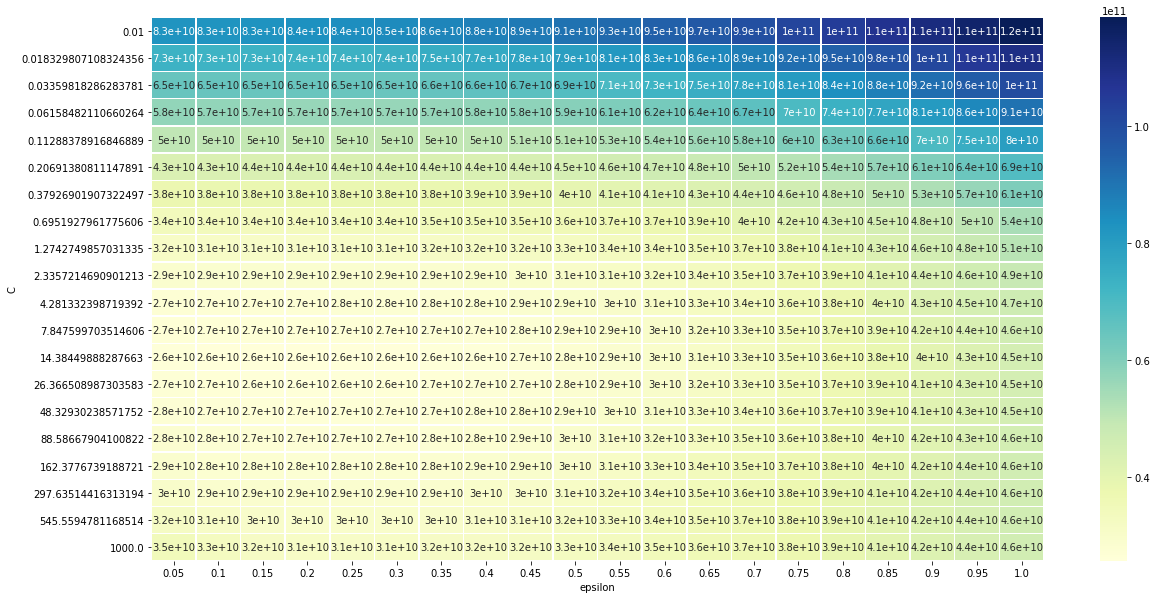

In [36]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(svr_results, cmap="YlGnBu",square=False,annot=True,linewidths=.5)
plt.show()

In [37]:
svr_top10 = results.sort_values(['mse']).head(10)
svr_top10

,C,epsilon,mse
72,14.384499,0.20,2.572984e+10
92,14.384499,0.25,2.579921e+10
52,14.384499,0.15,2.587435e+10
112,14.384499,0.30,2.591123e+10
32,14.384499,0.10,2.593080e+10
132,14.384499,0.35,2.609641e+10
12,14.384499,0.05,2.613960e+10
53,26.366509,0.15,2.634476e+10
73,26.366509,0.20,2.634717e+10
93,26.366509,0.25,2.637987e+10


**De todos los modelos entrenados, ¿Cuál es el mejor? (SVM)**

In [38]:
svr_top10.iloc[0]

C          1.438450e+01
epsilon    2.000000e-01
mse        2.572984e+10
Name: 72, dtype: float64

**¿Cómo se compara el desempeño de este modelo con el mejor modelo lineal encontrado por usted?**

In [39]:
df_final = []

In [40]:
reg = LinearRegression()
reg.fit(x_tr,y_tr)
    
pred_tr = reg.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = reg.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))

pred_test = reg.predict(x_test)
mse_test = metrics.mean_squared_error(inverse_transform(y_test,'price'),inverse_transform(pred_test,'price'))

df_final.append({'clasificador':'simple','mse':mse_test})

In [41]:
print("Regresión Lineal sin regularizacion, el MSE de training fue: {} ".format(mse_tr))
print("Regresión Lineal sin regularizacion, el MSE de validation fue: {} ".format(mse_val))
print("Regresión Lineal sin regularizacion, el MSE de test fue: {} ".format(mse_test))

Regresión Lineal sin regularizacion, el MSE de training fue: 24976545520.31761 
Regresión Lineal sin regularizacion, el MSE de validation fue: 28171210383.370995 
Regresión Lineal sin regularizacion, el MSE de test fue: 25427307584.332428 


In [42]:
best_lasso = results_lasso.sort_values(['mse_mean'],ascending=True).iloc[0]
l = best_lasso['lambda']

model = Lasso(alpha=l)
model.fit(x_tr,y_tr)
    
pred_tr = model.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = model.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))

pred_test = model.predict(x_test)
mse_test = metrics.mean_squared_error(inverse_transform(y_test,'price'),inverse_transform(pred_test,'price'))
mse_lasso_test = mse_test
df_final.append({'clasificador':'lasso','mse':mse_test})

In [43]:
print("Lasso, el MSE de training fue: {} ".format(mse_tr))
print("Lasso, el MSE de validation fue: {} ".format(mse_val))
print("Lasso, el MSE de test fue: {} ".format(mse_test))

Lasso, el MSE de training fue: 26081076158.16007 
Lasso, el MSE de validation fue: 29741588317.061142 
Lasso, el MSE de test fue: 26616336759.03257 


In [44]:
best_ridge = results_ridge.sort_values(['mse_mean'],ascending=True).iloc[0]
l = best_ridge['lambda']

model = Ridge(alpha=l)
model.fit(x_tr,y_tr)
    
pred_tr = model.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = model.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))

pred_test = model.predict(x_test)
mse_test = metrics.mean_squared_error(inverse_transform(y_test,'price'),inverse_transform(pred_test,'price'))
mse_ridge_test = mse_test
df_final.append({'clasificador':'ridge','mse':mse_test})

In [45]:
print("Ridge, el MSE de training fue: {} ".format(mse_tr))
print("Ridge, el MSE de validation fue: {} ".format(mse_val))
print("Ridge, el MSE de test fue: {} ".format(mse_test))

Ridge, el MSE de training fue: 24976555801.511864 
Ridge, el MSE de validation fue: 28172298916.884224 
Ridge, el MSE de test fue: 25428189196.94478 


In [46]:
best_svm = svr_top10.iloc[0]
C = best_svm['C']
epsilon = best_svm['epsilon']
sv = SVR(C=C, epsilon=epsilon)
sv.fit(x_tr,y_tr)

pred_tr = sv.predict(x_tr)
mse_tr = metrics.mean_squared_error(inverse_transform(y_tr,'price'),inverse_transform(pred_tr,'price'))

pred_val = sv.predict(x_val)
mse_val = metrics.mean_squared_error(inverse_transform(y_val,'price'),inverse_transform(pred_val,'price'))

pred_test = sv.predict(x_test)
mse_test = metrics.mean_squared_error(inverse_transform(y_test,'price'),inverse_transform(pred_test,'price'))
mse_svm_test = mse_test
df_final.append({'clasificador':'svm','mse':mse_test})

In [47]:
print("SVM para C:{} y epsilon:{}, el MSE de training fue: {} ".format(C,epsilon,mse_tr))
print("SVM para C:{} y epsilon:{}, el MSE de validation fue: {} ".format(C,epsilon,mse_val))
print("SVM para C:{} y epsilon:{}, el MSE de test fue: {} ".format(C,epsilon,mse_test))

SVM para C:14.38449888287663 y epsilon:0.2, el MSE de training fue: 6505704040.432043 
SVM para C:14.38449888287663 y epsilon:0.2, el MSE de validation fue: 25729835337.348732 
SVM para C:14.38449888287663 y epsilon:0.2, el MSE de test fue: 16294779537.611742 


**¿Cómo se compara el desempeño de este modelo con el mejor modelo lineal encontrado por usted?**

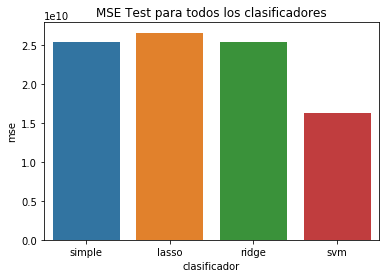

In [48]:
df_final = pd.DataFrame(df_final)
plt.title("MSE Test para todos los clasificadores")
sns.barplot(x='clasificador',y='mse',data=df_final)
plt.show()

Como se observa en el gráfico, la SVM es la que entrega menor error de testing, y tal como se puede observar tambien en los conjuntos de training y validación.